In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn import metrics

from keras.wrappers.scikit_learn import KerasRegressor
#from keras import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

# load a saved model
from keras.models import load_model

from matplotlib import pyplot

import os
%matplotlib inline
print(os.listdir("../dados/input"))

Using TensorFlow backend.


['teste.csv', 'todos.csv', 'todos2.csv', 'todos2.ods', 'treino.csv']


In [2]:
original_data = pd.read_csv('../dados/input/todos2.csv')

In [3]:
n_values = len(original_data.iloc[:,1])
n_test = 5
n_train = n_values - n_test
n_train_start = n_test+1
month = 1
day = 2
max_temp = 3
sales = 13

In [4]:
X_train = original_data.iloc[n_train_start : n_values, month : sales ]

In [11]:
X_train

,Mes,Dia,Temperatura,Precipitacao,Dia da Semana,Distancia Data Posterior,Distancia Data Anterior,Vendas 1d anterior,Vendas 2d anterior,Vendas 3d anterior,Vendas 4d anterior,Vendas 5d anterior
6,10,23,30.2,74.25,2,1,1,323,49,138,188,165
7,10,22,28.3,70.75,1,1,3,49,138,188,165,110
8,10,19,21.1,85.00,5,3,1,138,188,165,110,355
9,10,18,29.9,86.00,4,1,1,188,165,110,355,387
10,10,17,29.5,76.00,3,1,1,165,110,355,387,411
11,10,16,24.9,91.00,2,1,1,110,355,387,411,287
12,10,15,24.1,90.00,1,1,4,355,387,411,287,216
13,10,11,20.8,90.00,4,4,1,387,411,287,216,440
14,10,10,28.6,88.00,3,1,1,411,287,216,440,422
15,10,9,28.3,79.00,2,1,1,287,216,440,422,432


In [12]:
Y_train = original_data.iloc[n_train_start:n_values, sales]

In [13]:
Y_train

6      203
7      323
8       49
9      138
10     188
11     165
12     110
13     355
14     387
15     411
16     287
17     216
18     440
19     422
20     432
21     310
22     238
23     432
24     407
25     424
26     316
27     268
28     409
29     393
30     384
31     321
32     247
33     416
34     413
35     432
      ... 
268     16
269    141
270    117
271     42
272     20
273    363
274    162
275     35
276    351
277     21
278     23
279     27
280     28
281    162
282     23
283     14
284     84
285     41
286      9
287     15
288     15
289     17
290     26
291     10
292     14
293     17
294     26
295     10
296     22
297     14
Name: Total, Length: 292, dtype: int64

In [14]:
X_test = original_data.iloc[1:n_test+1, month : sales].values
X_test

array([[ 10.  ,  30.  ,  28.  ,  72.75,   2.  ,   1.  ,   1.  , 293.  ,
        263.  , 402.  , 382.  , 203.  ],
       [ 10.  ,  29.  ,  21.  ,  82.75,   1.  ,   1.  ,   3.  , 263.  ,
        402.  , 382.  , 203.  , 323.  ],
       [ 10.  ,  26.  ,  25.4 ,  85.5 ,   5.  ,   3.  ,   1.  , 402.  ,
        382.  , 203.  , 323.  ,  49.  ],
       [ 10.  ,  25.  ,  21.4 ,  91.  ,   4.  ,   1.  ,   1.  , 382.  ,
        203.  , 323.  ,  49.  , 138.  ],
       [ 10.  ,  24.  ,  19.5 ,  88.75,   3.  ,   1.  ,   1.  , 203.  ,
        323.  ,  49.  , 138.  , 188.  ]])

In [15]:
Y_test = original_data.iloc[1:n_test+1, sales].values
Y_test

array([437, 293, 263, 402, 382], dtype=int64)

In [16]:
scaler = StandardScaler().fit(X_train)
standardized_X_train = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

In [17]:
early_stopping_monitor = EarlyStopping(
                                        monitor = 'mean_squared_error', 
                                        mode = 'min',
                                        min_delta=1,
                                        verbose=0,
                                        patience = 500
)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='mean_squared_error', mode='min', verbose=0, save_best_only=True)

In [18]:
model1 = Sequential()
model1.add(
            Dense(
                    9,
                    activation='relu',
                    input_dim=standardized_X_train.shape[1]
            )
)
model1.add(
            Dense(1)
)
model1.compile(
                loss='mean_squared_error',
                optimizer='adam',
                metrics=[   'accuracy',
                            'mse',
                            'mae',
                        ]
)

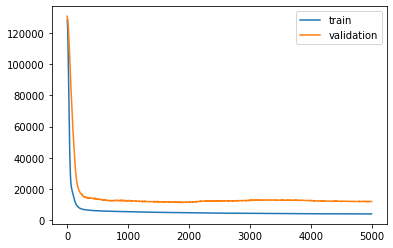

In [19]:
model1_history = model1.fit(
            standardized_X_train,
            Y_train,
            batch_size=5,
            epochs=5000,
            #validation_split=0.3,
            validation_data=(standardized_X_test,Y_test),
            verbose=0,
            callbacks=[model_checkpoint,early_stopping_monitor]
)

saved_model1 = load_model('best_model.h5')

pyplot.plot(model1_history.history['loss'], label='train')
pyplot.plot(model1_history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [20]:
model2 = Sequential()

model2.add(
            Dense(
                    standardized_X_train.shape[1],
                    activation='relu',
                    input_dim=standardized_X_train.shape[1]
            )
)
model2.add(
            Dense(
                    9,
                    activation='relu',
                    input_dim=standardized_X_train.shape[1]
            )
)
model2.add(
            Dense(1)
)
model2.compile(
                loss='mean_squared_error',
                optimizer='adam',
                metrics=[   'accuracy',
                            'mse',
                            'mae',
                        ]
)

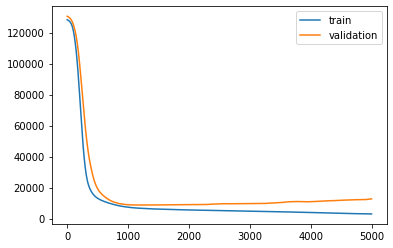

In [21]:
model2_history = model2.fit(
            standardized_X_train,
            Y_train,
            batch_size=148,
            epochs=5000,
            #validation_split=0.3,
            validation_data=(standardized_X_test,Y_test),
            verbose=0,
            callbacks=[model_checkpoint,early_stopping_monitor]
)
saved_model2 = load_model('best_model.h5')

pyplot.plot(model2_history.history['loss'], label='train')
pyplot.plot(model2_history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [22]:
model3 = Sequential()
model3.add(
            Dense(
                    standardized_X_train.shape[1],
                    activation='relu',
                    input_dim=standardized_X_train.shape[1]
            )
)
model3.add(
            Dense(
                    10,
                    activation='relu',
                    input_dim=standardized_X_train.shape[1]
            )
)
model3.add(
            Dense(
                    5,
                    activation='relu',
                    input_dim=10
            )
)
model3.add(
            Dense(1)
)
model3.compile(
                loss='mean_squared_error',
                optimizer='adam',
                metrics=[   'accuracy',
                            'mse',
                            'mae',
                        ]
)

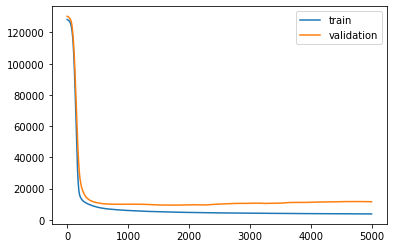

In [23]:
model3_history = model3.fit(
            standardized_X_train,
            Y_train,
            batch_size=148,
            epochs=5000,
            #validation_split=0.3,
            validation_data=(standardized_X_test,Y_test),
            verbose=0,
            callbacks=[model_checkpoint,early_stopping_monitor]
)

saved_model3 = load_model('best_model.h5')

pyplot.plot(model3_history.history['loss'], label='train')
pyplot.plot(model3_history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [24]:
predictions1 = saved_model1.predict(standardized_X_test)
predictions2 = saved_model2.predict(standardized_X_test)
predictions3 = saved_model3.predict(standardized_X_test)

# evaluate the model
train_acc1 = saved_model1.evaluate(standardized_X_train, Y_train)
train_acc2 = saved_model2.evaluate(standardized_X_train, Y_train)
train_acc3 = saved_model3.evaluate(standardized_X_train, Y_train)
test_acc = saved_model3.evaluate(standardized_X_test, Y_test)

print(saved_model1.metrics_names)
print('Model 1: ') 
print(train_acc1)
print('Model 2: ') 
print(train_acc2)
print('Model 3: ') 
print(train_acc3)
print('Test: ') 
print(test_acc)

5/5 [==============================] - 0s 0us/step
['loss', 'acc', 'mean_squared_error', 'mean_absolute_error']
Model 1: 
[4107.452616652397, 0.0136986301369863, 4107.452616652397, 46.15804771527852]
Model 2: 
[3032.39204302226, 0.010273972602739725, 3032.39204302226, 38.33108374190657]
Model 3: 
[3032.39204302226, 0.010273972602739725, 3032.39204302226, 38.33108374190657]
Test: 
[12721.55859375, 0.0, 12721.55859375, 86.51399993896484]


Text(0, 0.5, 'Model 3 Predicted Y')

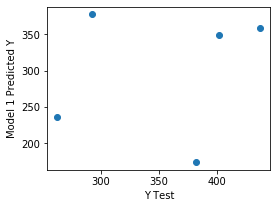

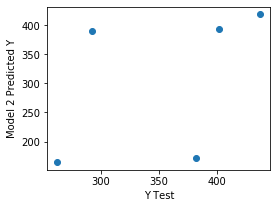

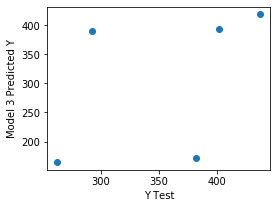

In [25]:
plt.figure(figsize=(4,3))
plt.scatter(Y_test[:200],predictions1[:200])
plt.xlabel('Y Test')
plt.ylabel('Model 1 Predicted Y')

plt.figure(figsize=(4,3))
plt.scatter(Y_test[:200],predictions2[:200])
plt.xlabel('Y Test')
plt.ylabel('Model 2 Predicted Y')

plt.figure(figsize=(4,3))
plt.scatter(Y_test[:200],predictions3[:200])
plt.xlabel('Y Test')
plt.ylabel('Model 3 Predicted Y')

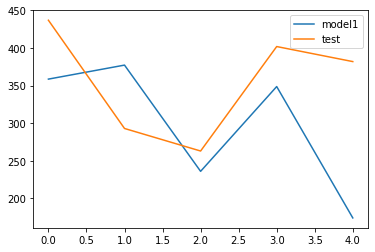

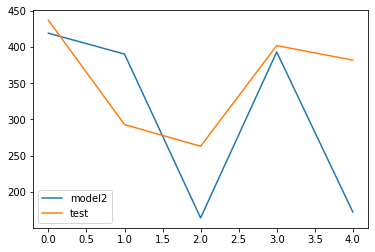

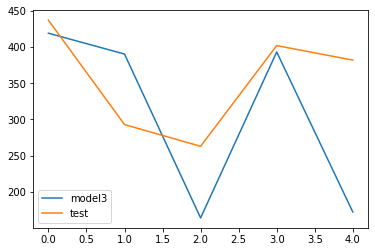

In [26]:
pyplot.plot(predictions1, label='model1')
pyplot.plot(Y_test, label='test')
pyplot.legend()
pyplot.show()

pyplot.plot(predictions2, label='model2')
pyplot.plot(Y_test, label='test')
pyplot.legend()
pyplot.show()

pyplot.plot(predictions3, label='model3')
pyplot.plot(Y_test, label='test')
pyplot.legend()
pyplot.show()